In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("blogtext.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


There is no null entries in the dataset.

In [3]:
#create the dataframe for authors
'''
ids=df['id'].unique()
df_authors=pd.DataFrame(index=ids,columns=['gender','age','sign'])
for id in ids:
    df_authors.at[id,'gender']=df[df['id']==id]['gender'].values[0]
    df_authors.at[id,'age']=df[df['id']==id]['age'].values[0]
    df_authors.at[id,'sign']=df[df['id']==id]['sign'].values[0]
df_authors.info()
df_authors.head()
df_authors.to_csv('authors.csv')
'''
df_authors=pd.read_csv('authors.csv')
                                           

In [4]:
df_authors['gender'].value_counts()

female    9660
male      9660
Name: gender, dtype: int64

It is shown that the amount of male authors and female authors are the same in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c1c728828>]],
      dtype=object)

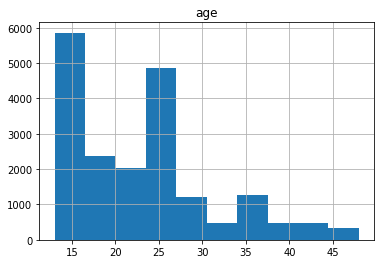

In [5]:
#age distribution of authors
df_authors['age']=df_authors['age'].astype('int')
df_authors.hist(column='age')

The author distribution suggests that there are two groups of frequent blog writers, teenagers around 15 and young people around 25.

In [6]:
df['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [7]:
df_authors['sign'].value_counts()

Virgo          1783
Cancer         1722
Libra          1700
Taurus         1645
Scorpio        1631
Leo            1619
Aries          1597
Gemini         1595
Pisces         1580
Sagittarius    1549
Aquarius       1474
Capricorn      1425
Name: sign, dtype: int64

In [8]:
df=df[['topic','text']]

In [9]:
#word counting for each text
def CountWord(text):
    return len(text.split())

df['word count']=df['text'].apply(CountWord)
df.head()


,topic,text,word count
0,Student,"Info has been found (+/- 100 pages,...",28
1,Student,These are the team members: Drewe...,20
2,Student,In het kader van kernfusie op aarde...,4326
3,Student,testing!!! testing!!!,2
4,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can ...,65


In [10]:
df.sort_values('word count',ascending=False).head()

,topic,text,word count
529872,indUnk,Excerpts from the HRW report: [prologu...,131169
302666,Education,It happened that among those ...,115370
658665,Student,Prolouge to a Mack part I - 12/8/2001 ...,71212
31751,indUnk,"Tuesday, October 28, 2003 So...Andrew ...",56045
384759,Communications-Media,Fear And Loathing In Las Vegas A...,55340


In [15]:
def CountLevel(x):
    if x==0:
        return 0
    return int(np.log10(x))+1

df['word count level']=df['word count'].apply(CountLevel)

In [16]:
df['word count level'].value_counts()

3    351568
2    261506
1     52575
4     12451
0      3119
5        63
6         2
Name: word count level, dtype: int64

There are 3119 blogs of 0 word, 52575 blogs of 1 to 9 words, 261506 blogs of 10 to 99 words, 351568 blogs of 100 to 999 words,12451 blogs of 1000 to 9999 words, 63 blogs of 10000~99999 words,6 blogs with 100000 to 999999 words

Blogs with too less words may not be very good samples for our model, we will only keep models that have at least 100 words, that is the 53.44% of the orignal blogs.

In [20]:
df=df[df['word count level']>=3][['topic','text']

In [22]:
df['topic'].value_counts()

indUnk                     132012
Student                     84522
Technology                  19411
Education                   17613
Arts                        17528
Communications-Media        10600
Non-Profit                   7627
Internet                     7421
Engineering                  6362
Publishing                   5067
Law                          4968
Science                      3931
Government                   3878
Religion                     3405
Consulting                   3215
BusinessServices             2693
Advertising                  2655
Marketing                    2574
Fashion                      2569
Accounting                   2389
Telecommunications           2000
Sports-Recreation            1864
Military                     1825
RealEstate                   1824
Banking                      1784
Museums-Libraries            1710
HumanResources               1470
Manufacturing                1377
Chemicals                    1301
Tourism       

In [23]:
#remove unwanted text
def CleanText(text):
    return re.sub(r'[^A-Za-z]+',' ',text).lower().strip()
df['cleaned_text']=df['text'].apply(CleanText)

In [36]:
print("Orginal Text Sample:\n")
print(df['text'].values[1][:100]+'\n\n')

print("Cleaned Text Sample:")
print(df['cleaned_text'].values[1][:100])

Orginal Text Sample:

             I had an interesting conversation with my Dad this morning.  We were talking about wher


Cleaned Text Sample:
i had an interesting conversation with my dad this morning we were talking about where koreans put t


In [38]:
#remove all stop words from English, 
#these are words that will not affect the NLP process to understand the meanings
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

df['cleaned_text']=df['cleaned_text'].apply(lambda x: 
    ' '.join([words for words in x.split() if words not in stopwords]))



In [43]:
print(stopwords)

{'because', 'm', 'off', 'doesn', 'me', 'after', 'just', "needn't", 'having', "couldn't", 'those', "hadn't", 'or', "shouldn't", 'that', 'each', 'most', 'by', 'i', 'above', 'herself', 'these', 'any', "hasn't", 'her', 'who', 'shouldn', 'haven', 'don', 'against', 'own', 'further', 'he', "you've", "won't", 'here', "don't", 'them', 'wasn', 'on', "that'll", 'same', 'whom', 'have', 'out', 'itself', 'to', 'ours', 'him', 'so', 'y', 'before', 'why', 'will', "should've", 'should', 'from', 'does', 'how', 'you', 'this', 'our', 'as', 'under', "shan't", 'was', 'until', 'more', 'll', 'your', "isn't", 'very', "you'd", 'mustn', 'been', 'while', 'now', 'when', 'once', 'for', 'down', 'their', 'all', 'during', 'of', "aren't", 'yourselves', 'over', "doesn't", 'weren', 'into', 'my', 'themselves', 'which', 'o', 'ourselves', 'nor', 'we', 'mightn', 'again', "mustn't", 'few', 'aren', "didn't", 'hadn', 'yourself', 'they', 'she', 'ma', 'not', 'myself', 'himself', 'being', 'shan', 'such', 'yours', 's', 'only', 't', 

In [39]:
print("Orginal Text Sample:\n")
print(df['text'].values[1][:100]+'\n\n')

print("Cleaned Text Sample:")
print(df['cleaned_text'].values[1][:100])

Orginal Text Sample:

             I had an interesting conversation with my Dad this morning.  We were talking about wher


Cleaned Text Sample:
interesting conversation dad morning talking koreans put money invariably lot real estate cash cash 


In [40]:
data=df[['topic','cleaned_text']]

In [41]:
data.to_csv('data.csv')